# Customer Churn Prediction

This project aims to predict customer churn of the service provider "TeleDom". The company plans to use the machine learning algorithm to predict whether the customer plans to terminate the contract. Retaining customers is crucial for the company's success and profits, so these customers will be strategically offered special incentives and gifts.

The client provided 4 datasets with comprehensive information about its customers for training and testing the algorithm. The binary classification task will be solved. The project metric is ROC-AUC score; for successful completion of the project, ROC-AUC should be more than 0.85 on the testing data.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Pre-processing</a></span><ul class="toc-item"><li><span><a href="#Target-Variable" data-toc-modified-id="Target-Variable-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Target Variable</a></span></li><li><span><a href="#Processing-Dates" data-toc-modified-id="Processing-Dates-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Processing Dates</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Data-Type-Change" data-toc-modified-id="Data-Type-Change-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data Type Change</a></span></li><li><span><a href="#Data-Merging" data-toc-modified-id="Data-Merging-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Data Merging</a></span></li><li><span><a href="#Processing-Missing-Values" data-toc-modified-id="Processing-Missing-Values-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Processing Missing Values</a></span></li><li><span><a href="#Processing-Duplicates" data-toc-modified-id="Processing-Duplicates-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Processing Duplicates</a></span></li><li><span><a href="#Multicollinearity-Check" data-toc-modified-id="Multicollinearity-Check-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Multicollinearity Check</a></span></li><li><span><a href="#Data-Study" data-toc-modified-id="Data-Study-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Data Study</a></span></li><li><span><a href="#Data-Splitting" data-toc-modified-id="Data-Splitting-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Data Splitting</a></span></li><li><span><a href="#Data-Encoding-and-Scaling" data-toc-modified-id="Data-Encoding-and-Scaling-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Data Encoding and Scaling</a></span></li></ul></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Machine Learning</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#Best-Model-Analysis" data-toc-modified-id="Best-Model-Analysis-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Best Model Analysis</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [2]:
pip install --upgrade pip

In [3]:
!pip install phik
!pip install optuna
!pip install ydata_profiling
!pip install catboost

In [3]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import phik
import optuna
from ydata_profiling import ProfileReport
from optuna.samplers import TPESampler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
                             )
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier
from IPython.display import Image

In [4]:
%matplotlib inline

In [5]:
pth01 = 'contract_new.csv'
pth02 = '/datasets/contract_new.csv'
pth03 = '/content/datasets/contract_new.csv'
pth11 = 'internet_new.csv'
pth12 = '/datasets/internet_new.csv'
pth13 = '/content/datasets/internet_new.csv'
pth21 = 'personal_new.csv'
pth22 = '/datasets/personal_new.csv'
pth23 = '/content/datasets/personal_new.csv'
pth31 = 'phone_new.csv'
pth32 = '/datasets/phone_new.csv'
pth33 = '/content/datasets/phone_new.csv'

if os.path.exists(pth01):
    contract_new = pd.read_csv(pth01)
elif os.path.exists(pth02):
    contract_new = pd.read_csv(pth02)
elif os.path.exists(pth03):
    contract_new = pd.read_csv(pth03)
else:
    print('Error')

if os.path.exists(pth11):
    internet_new = pd.read_csv(pth11)
elif os.path.exists(pth12):
    internet_new = pd.read_csv(pth12)
elif os.path.exists(pth13):
    internet_new = pd.read_csv(pth13)
else:
    print('Error')

if os.path.exists(pth21):
    personal_new = pd.read_csv(pth21)
elif os.path.exists(pth22):
    personal_new = pd.read_csv(pth22)
elif os.path.exists(pth23):
    personal_new = pd.read_csv(pth23)
else:
    print('Error')

if os.path.exists(pth31):
    phone_new = pd.read_csv(pth31)
elif os.path.exists(pth32):
    phone_new = pd.read_csv(pth32)
elif os.path.exists(pth33):
    phone_new = pd.read_csv(pth33)
else:
    print('Error')

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
RANDOM_STATE = 131123

## Exploratory Data Analysis

In [8]:
profile = ProfileReport(contract_new, title="Contract New Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile = ProfileReport(internet_new, title="Internet New Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
profile = ProfileReport(personal_new, title="Personal New Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
profile = ProfileReport(phone_new, title="Phone New Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Main conclusions on detailed dataset reports:
- There are no missing values or duplicates;
- In the target variable (column EndDate) there are imbalanced classes. The ratio of clients who stopped using company's services to clients who stayed with the company is 1:3.
- We'll have to change data types of columns EndDate, BeginDate, TotalCharges. Changing types of columns with dates will allow us to create a new feature.

## Data Pre-processing



### Target Variable

We will create a target variable based on column *Target* to solve a problem of binary classification.

In [12]:
contract_new_preproc = contract_new.copy()
contract_new_preproc['Target'] = pd.Series(dtype = 'int')
contract_new_preproc['Target'] = contract_new_preproc[contract_new_preproc['EndDate'] == 'No']['Target'].fillna(0)
contract_new_preproc['Target'] = contract_new_preproc['Target'].fillna(1)

### Processing Dates

We will replace the end date of the contracts that have not been terminated with FEB 01 2020 (the date of data export) in order to convert the EndDate column to a datetime type and calculate the length of service.

In [13]:
contract_new_preproc['EndDate'] = contract_new_preproc['EndDate'].replace('No',
    '2020-02-01')

Let's change data types of BeginDate and EndDate columns.

In [14]:
contract_new_preproc['BeginDate'] = pd.to_datetime(contract_new_preproc['BeginDate'])
contract_new_preproc['EndDate'] = pd.to_datetime(contract_new_preproc['EndDate'])

### Feature Engineering

We will create feature Length which will represent the length of contract (in months, starting from BeginDate).

In [15]:
contract_new_preproc['Length'] = contract_new_preproc['EndDate'] - contract_new_preproc['BeginDate']
contract_new_preproc['Length'] = contract_new_preproc['Length'] / np.timedelta64(1, 'M')

### Data Type Change

Let's change data type of column TotalCharges in dataset contract_new.

In [16]:
contract_new_preproc = contract_new_preproc.drop(
    index = contract_new_preproc[contract_new_preproc['TotalCharges'] == ' '].index)

In [17]:
contract_new_preproc['TotalCharges'] = contract_new_preproc['TotalCharges'].astype('float')

### Data Merging

We will merge other datasets to the dataframe 'data' based on the column customerID, after extracting the necessary columns from them.

In [18]:
data = contract_new_preproc[['customerID', 'MonthlyCharges', 'Type', 'PaperlessBilling',
                            'PaymentMethod', 'TotalCharges', 'Length', 'Target']]

In [19]:
data = contract_new_preproc
data = data.merge(internet_new, how = 'left', on = 'customerID')
data = data.merge(personal_new, how = 'left', on = 'customerID')
data = data.merge(phone_new, how = 'left', on = 'customerID')

### Processing Missing Values

Due to the merge, there are missing values in the data as not all customers from the original dataset (contract_new) used other services, information about which is contained in the internet_new and phone_new datasets. Let's fill them with the value "N/A" (not applicable).

In [20]:
data = data.fillna('N/A')

### Processing Duplicates

Before deleting the column with customerIDs, let's check if there are any duplicates in the dataset.

In [21]:
data.duplicated().sum()

0

### Multicollinearity Check

Before generating the heat map, let's remove the columns customerID, EndDate, and BeginDate from the dataset as they will not be used in further analysis.

In [22]:
data = data.drop(columns = ['customerID', 'EndDate', 'BeginDate'])

Let's create a heat map visualizing multicollinearity between the features (obtained using the phik library). Since multicollinearity negatively affects the quality of machine learning, we will remove multicollinear features.

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'Target', 'Length', 'SeniorCitizen']


<Axes: >

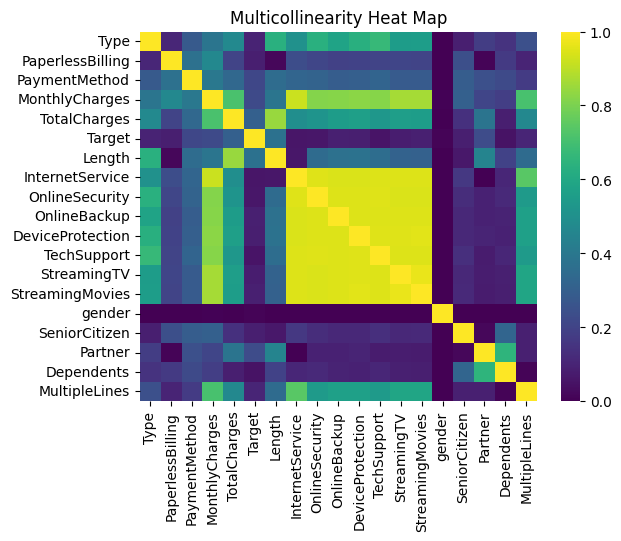

In [23]:
plt.subplot()
display(sns.heatmap(data.phik_matrix(), cmap='viridis'))
plt.title('Multicollinearity Heat Map')
plt.show()

In [24]:
data = data.drop(columns = ['TotalCharges', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'OnlineBackup'])

Let's check that all multicollinear features had been removed by displaying the heat map again.

interval columns not set, guessing: ['MonthlyCharges', 'Target', 'Length', 'SeniorCitizen']


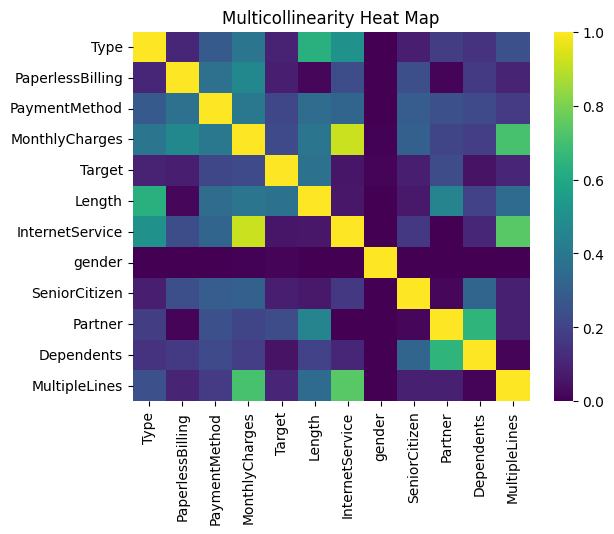

In [25]:
plt.subplot()
sns.heatmap(data.phik_matrix(), cmap='viridis')
plt.title('Multicollinearity Heat Map')
plt.show()

Columns InternetService and MonthlyCharges may be multicollinear, but this correlation may be natural because of the real relationship between these features as internet service payments significantly increase monthly expenses.

### Data Study

Let's visualize the data on which the machine learning will be conducted.

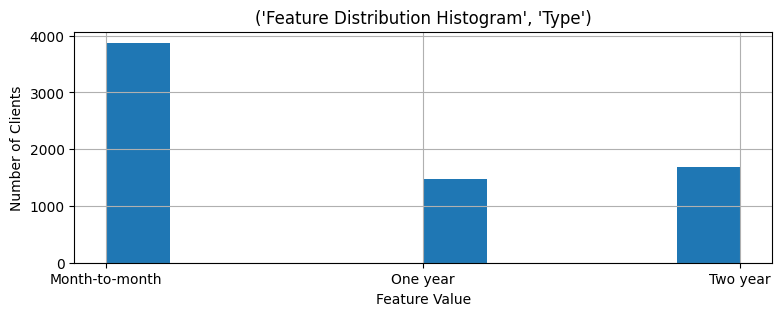

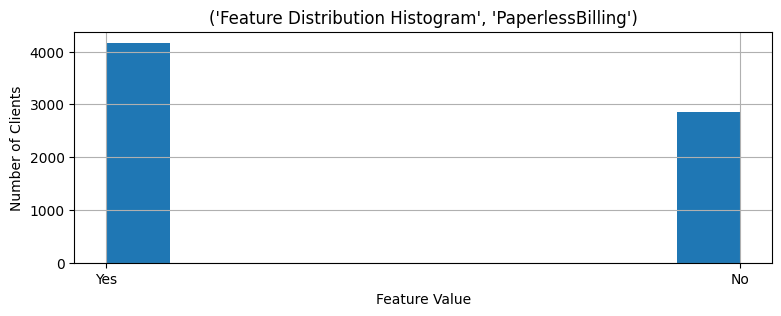

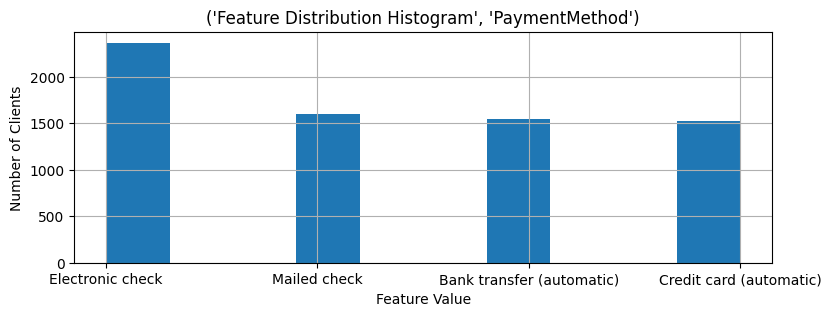

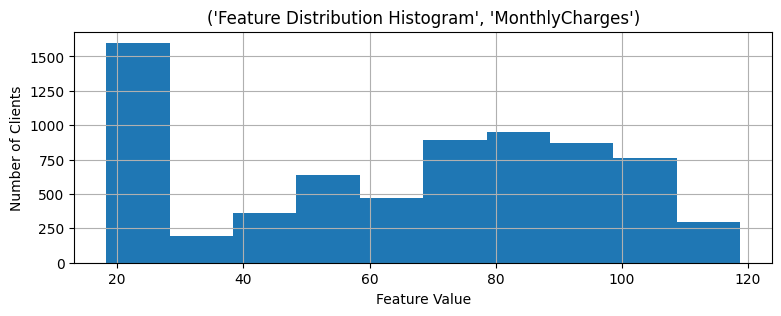

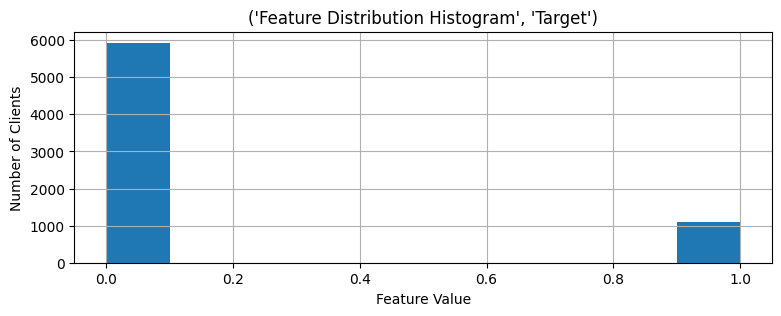

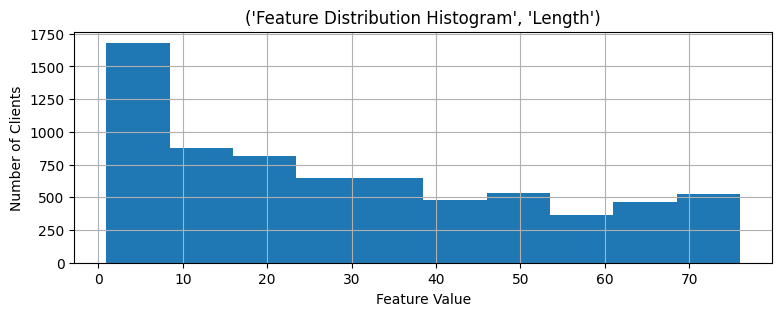

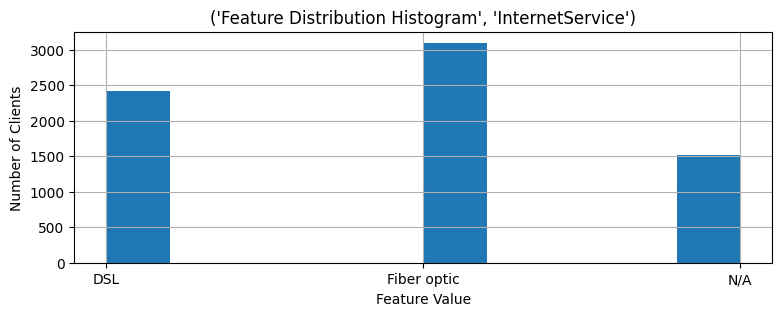

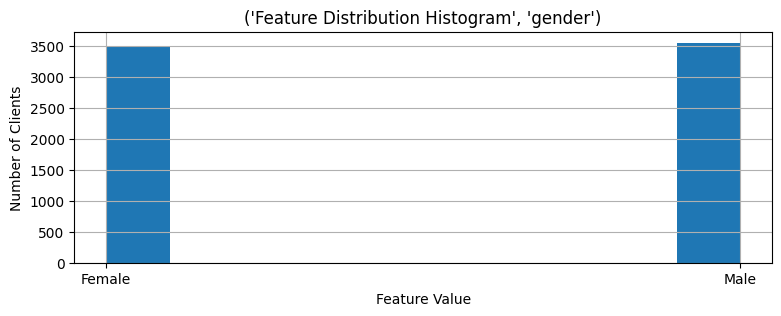

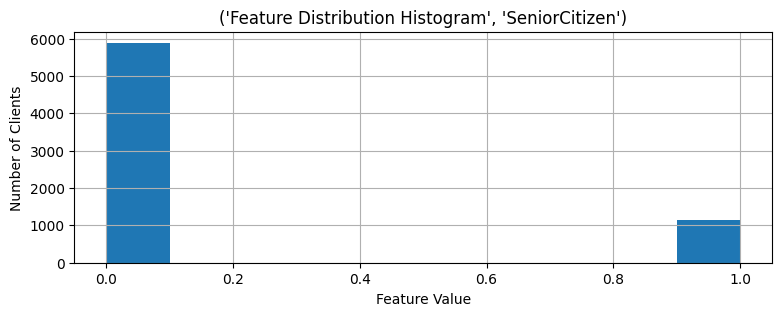

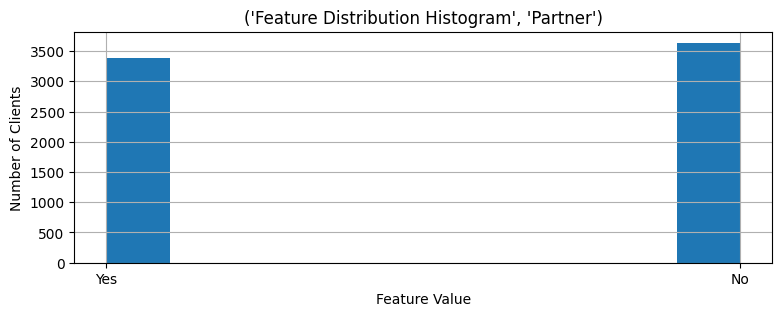

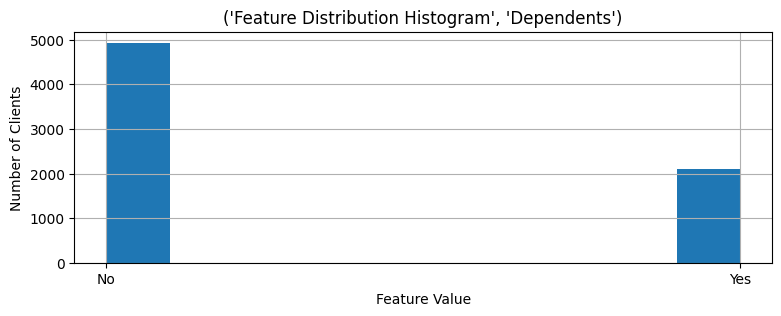

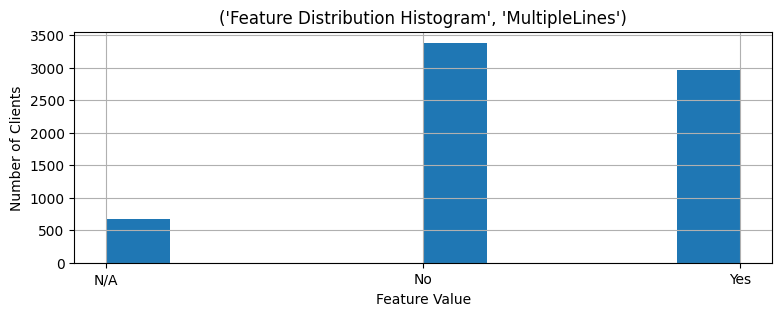

In [26]:
for i in data.columns:
    plt.figure(figsize = (9, 3))
    data[i].hist(bins = 10)
    plt.title(('Feature Distribution Histogram', i))
    plt.ylabel('Number of Clients')
    plt.xlabel('Feature Value')
    plt.show()

In [27]:
print(data['Length'].describe())
print()
print(data['MonthlyCharges'].describe())

count    7032.000000
mean       29.568125
std        22.431303
min         0.919937
25%         9.067948
50%        25.002567
75%        48.000986
max        76.026202
Name: Length, dtype: float64

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64


Let's describe some features of the final data:
- Most users use month-to-month contracts.
- Most users use the PaperlessBilling feature.
- Most users in the sample are not pensioners and do not have dependents.
- The gender and Partner features are approximately balanced.

### Data Splitting

Before using linear models, it is necessary to use OneHotEncoder and StandardScaler on the data. To avoid data leakage, we will split the data into training and test sets, training OHE/scaler only on the training dataset.

Cross-validation will be used to select the final model.

In [28]:
features = data.drop(columns = 'Target')
target = data['Target']

In [29]:
train_features, test_features = train_test_split(features, test_size = 0.25, random_state = RANDOM_STATE)
train_target, test_target = train_test_split(target, test_size = 0.25, random_state = RANDOM_STATE)

### Data Encoding and Scaling

In [30]:
encoder = OneHotEncoder()
train_categorical = train_features.drop(columns = ['MonthlyCharges', 'Length'])
test_categorical = test_features.drop(columns = ['MonthlyCharges', 'Length'])
train_categorical_preproc = pd.DataFrame(encoder.fit_transform(train_categorical).toarray())
test_categorical_preproc = pd.DataFrame(encoder.transform(test_categorical).toarray())

In [31]:
scaler = StandardScaler()
train_numerical = train_features[['MonthlyCharges', 'Length']]
test_numerical = test_features[['MonthlyCharges', 'Length']]
train_numerical = scaler.fit_transform(train_numerical)
test_numerical = scaler.fit_transform(test_numerical)
train_numerical_preproc = pd.DataFrame(train_numerical)
test_numerical_preproc = pd.DataFrame(test_numerical)

In [32]:
train_features_preproc = pd.concat([train_categorical_preproc, train_numerical_preproc], axis = 1)
test_features_preproc = pd.concat([test_categorical_preproc, test_numerical_preproc], axis = 1)
print(train_features_preproc.shape)
print(test_features_preproc.shape)

(5274, 25)
(1758, 25)


## Machine Learning

As the first model, we will use logistic regression, and then move on to gradient boosting using the CatBoost library with hyperparameter tuning through Optuna.

### Logistic Regression

In [33]:
model = LogisticRegression(random_state = RANDOM_STATE)
cross_validate(model, train_features_preproc, train_target, scoring = 'roc_auc')

{'fit_time': array([0.04772234, 0.03306174, 0.03696299, 0.03083897, 0.03411674]),
 'score_time': array([0.00704098, 0.00647521, 0.00547957, 0.00528049, 0.00531054]),
 'test_score': array([0.76653069, 0.76012839, 0.6996952 , 0.75862464, 0.76282156])}

Despite the high training and prediction speed, logistic regression shows a significantly lower target metric than the expected by customer. Let’s move on to gradient boosting.

### Gradient Boosting

We will identify a list of categorical variables to pass them to CatBoost, and also repeat the process of forming datasets. Since cross-validation will be used with gradient boosting, splitting the data into training and test sets will only be required for the final analysis of the best model.

In [34]:
cat_features = train_categorical.columns

Let’s try to train a standard CatBoostClassifier on the training set without tuning hyperparameters:

In [35]:
model = CatBoostClassifier(cat_features = list(cat_features), verbose = False, random_seed = RANDOM_STATE)
cross_validate(model, train_features, train_target, scoring = 'roc_auc')

{'fit_time': array([10.07399535,  9.15301752,  8.65643239,  9.88580632,  8.99758482]),
 'score_time': array([0.0105176 , 0.01484013, 0.00942874, 0.00957704, 0.01590419]),
 'test_score': array([0.88806294, 0.89592437, 0.84137805, 0.88270081, 0.89282129])}

The target metric meets the minimum threshold set by the customer, but we can improve it by using Optuna. By default, Optuna uses Bayesian method of optimization to find the best hyperparameters, which allows it to quickly and efficiently find the most efficient hyperparameters for the given learning task.

In [36]:
def objective(trial):
    model = CatBoostClassifier(
        iterations = trial.suggest_int("iterations", 100, 1000),
        learning_rate = trial.suggest_float("learning_rate", 1e-3, 1e-1, log = True),
        depth = trial.suggest_int("depth", 4, 10),
        l2_leaf_reg = trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log = True),
        bagging_temperature = trial.suggest_float("bagging_temperature", 0.0, 10.0),
        verbose = False,
        cat_features = list(cat_features),
        auto_class_weights = trial.suggest_categorical("auto_class_weights", [None, 'Balanced', 'SqrtBalanced']),
        random_seed = RANDOM_STATE)
    cv = cross_validate(model, train_features, train_target, scoring = 'roc_auc')
    return cv['test_score'].mean()

In [37]:
sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=5)

[I 2023-12-22 21:50:13,515] A new study created in memory with name: catboost
[I 2023-12-22 21:50:30,829] Trial 0 finished with value: 0.8733225710943563 and parameters: {'iterations': 475, 'learning_rate': 0.027583475549166746, 'depth': 4, 'l2_leaf_reg': 1.0551779964424746e-05, 'bagging_temperature': 1.4675589081711304, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 0 with value: 0.8733225710943563.
[I 2023-12-22 21:50:50,356] Trial 1 finished with value: 0.839922136474045 and parameters: {'iterations': 457, 'learning_rate': 0.011957309429716375, 'depth': 6, 'l2_leaf_reg': 0.0711532929635137, 'bagging_temperature': 2.0445224973151745, 'auto_class_weights': None}. Best is trial 0 with value: 0.8733225710943563.
[I 2023-12-22 21:51:07,039] Trial 2 finished with value: 0.8448254035001561 and parameters: {'iterations': 475, 'learning_rate': 0.01310326900146444, 'depth': 4, 'l2_leaf_reg': 9.572268915979563e-07, 'bagging_temperature': 8.007445686755366, 'auto_class_weights': None}. Be

**The best result of hyperparameter tuning:**

Trial 3 finished with value: 0.927565580038775 and parameters: {'iterations': 889, 'learning_rate': 0.06154791240242939, 'depth': 4, 'l2_leaf_reg': 2.457807314308479e-08, 'bagging_temperature': 1.698304195645689, 'auto_class_weights': None}. Best is trial 3 with value: 0.927565580038775.

### Best Model Analysis

Once again, let’s perform cross-validation on the best model to see how fast it learns.

In [51]:
model = CatBoostClassifier(
        iterations=889,
        learning_rate=0.06154791240242939,
        depth=4,
        l2_leaf_reg=2.457807314308479e-08,
        bagging_temperature=1.698304195645689,
        verbose=False,
        cat_features = list(cat_features),
        random_seed = RANDOM_STATE)
cv = cross_validate(model, train_features, train_target, scoring = 'roc_auc')

In [54]:
print('Average training time on cross-validation:', cv['fit_time'].mean(), 's')
print('Average scoring time on cross-validation:', cv['score_time'].mean(), 's')
print('Average ROC-AUC metric on cross-validation:', cv['test_score'].mean())

Average training time on cross-validation: 11.509887075424194 s
Average scoring time on cross-validation: 0.01624469757080078 s
Average ROC-AUC metric on cross-validation: 0.9275303434794895


Let's train the best model on the whole training dataset and display the roc-auc score, accuracy and ROC curve for testing dataset. We will compare the ROC curves of DummyClassifier and the final model.

In [49]:
model.fit(train_features, train_target)
predicted_proba = model.predict_proba(test_features)[:, 1]
predictions = model.predict(test_features)
print('ROC-AUC score on testing data:', roc_auc_score(test_target, predicted_proba))
print('Accuracy score on testing data:', accuracy_score(test_target, predictions))

ROC-AUC score on testing data: 0.9362328458379245
Accuracy score on testing data: 0.9448236632536974


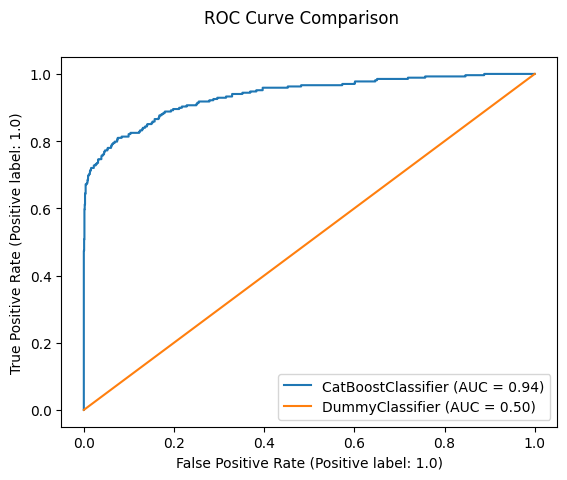

In [41]:
dummy = DummyClassifier()
dummy.fit(train_features_preproc, train_target)
fig = RocCurveDisplay.from_estimator(model, test_features, test_target)
fig = RocCurveDisplay.from_estimator(dummy, test_features_preproc, test_target, ax = fig.ax_)
fig.figure_.suptitle("ROC Curve Comparison")
plt.show()

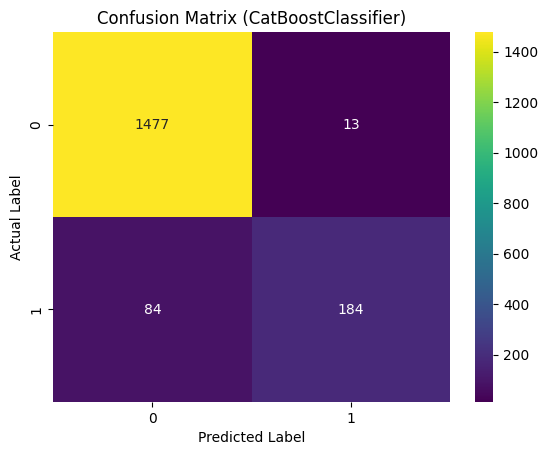

In [42]:
plt.subplot()
sns.heatmap(confusion_matrix(test_target, predictions), cmap='viridis', annot = True, fmt='.10g')
plt.title('Confusion Matrix (CatBoostClassifier)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

The majority of errors is related to false negatives. The model mistakenly mark some customers as potentially leaving, but it does not tend to give false positive predictions.

In [43]:
feature_importance = pd.DataFrame(index = [train_features.columns], data = model.get_feature_importance(),
    columns = ['Importance'])

Text(0.5, 1.0, 'Feature Importance Graph')

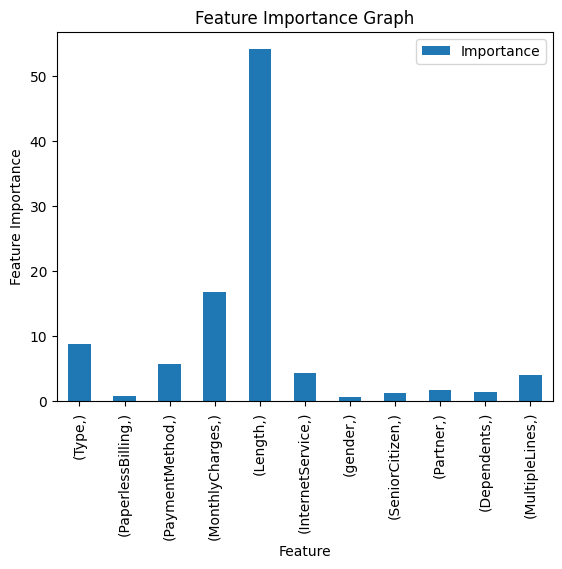

In [44]:
feature_importance.plot(kind = 'bar')
plt.ylabel('Feature Importance')
plt.xlabel('Feature')
plt.title('Feature Importance Graph')

## Conclusion

During the project execution, a machine learning model based on gradient boosting was developed. It successfully determines whether a customer plans to terminate the contract with the "TeleDom" service provider.

Hyperparameter tuning was performed using the Optuna library, with the training task being maximizing the ROC-AUC metric on cross-validation. On the test set, the ROC-AUC metric of the final model is 0.936, the accuracy is 0.944, and the average training time is approximately 4.5 seconds (on Yandex servers). The code for the final model is as follows:

```
model = CatBoostClassifier(
        iterations=889,
        learning_rate=0.06154791240242939,
        depth=4,
        l2_leaf_reg=2.457807314308479e-08,
        bagging_temperature=1.698304195645689,
        verbose=False,
        cat_features = list(cat_features),
        random_seed = 131123)
```

We used a part of data provided for machine learning purposes. Multicollinear features that could negatively impact the quality of machine learning were removed. The final list of features used for model training includes:

- Categorical features (Type, PaperlessBilling, InternetService, gender, SeniorCitizen, Partner, Dependents, MultipleLines) were passed to CatBoost as model parameters.
- Numerical features (MonthlyCharges, a derived feature Length) were also passed to CatBoost. Since the model used is based on boosting decision trees, scaling was not required.

Before training the gradient boosting model, an attempt was made to train a logistic regression model as its results are easier to interpret for business purposes. However, it demonstrated a lower target metric (ROC-AUC ~0.75). During data preprocessing for training this model, categorical features were encoded using OneHotEncoder, and numerical features were standardized with StandardScaler.

The feature importance graph may be found below:

![Feature Importance Graph](https://i.imgur.com/GKgkxXH.png)

The most important features for predicting customer churn are MonthlyCharges and Length. Removing the least important features could help optimize the model, but testing revealed that it negatively affects the model's learning quality.



The plot below visualizes the ROC curve of the final model and the ROC curve of the constant model (DummyClassifier). The obtained model significantly outperforms the constant model.

![ROC Curve Comparison](https://i.imgur.com/CuMfRIq.png)

Let's visualize the confusion matrix:

![Confusion Matrix](https://i.imgur.com/c5xrHMo.png)

The majority of errors are related to falsely assigning the "0" class (i.e., customers who continue to use the company's services) to departing customers; the number of incorrect predictions for class "1" is minimal.

This model's peculiarities may be related to various reasons for customer refusal of services from the "TeleDom" operator; the number of false predictions may decrease if there is more training data. When implementing the model in business, it is recommended to issue promo codes or offer special conditions to those who, according to the model's predictions, plan to terminate the contract.

The model predicts the possibility of a customer discontinuing the company's services, but it may require significant computational resources for training due to the complexity of the model and the high number of iterations. Meanwhile, prediction time remains comparatively low, allowing effective business use.